We want matplotlib to work inline in the notebook.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Basic plotting

plot() is the most basic command.  Here we also see that we can use LaTeX notation for the axes

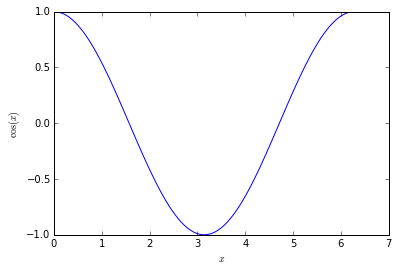

In [3]:
x = np.linspace(0,2.0*np.pi, num=100)
y = np.cos(x)

plt.plot(x,y)
plt.xlabel(r"$x$")
plt.ylabel(r"$\cos(x)$")

we can plot multiple lines on a plot and set their colors or linestyle -- the latter come through the third argument.  Here we also tighten up the x range of the plot

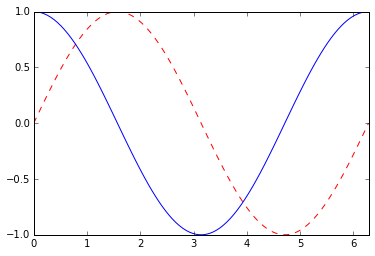

In [4]:
plt.clf()
plt.plot(x, np.sin(x), "r--")
plt.plot(x, np.cos(x), "b-")
plt.xlim(0.0, 2.0*np.pi)
plt.show()

we can use symbols instead of lines pretty easily too -- and label them

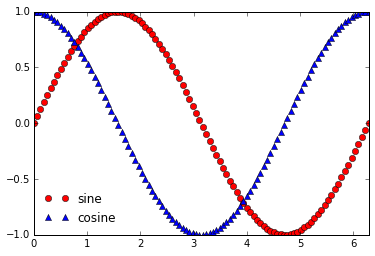

In [5]:
plt.plot(x, np.sin(x), "ro", label="sine")
plt.plot(x, np.cos(x), "b^", label="cosine")
plt.xlim(0.0, 2.0*np.pi)
plt.legend(frameon=False, loc="best")

most functions take a number of optional named argumets too

(0.0, 6.283185307179586)

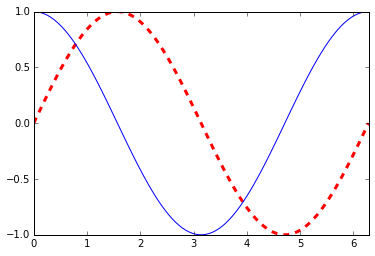

In [6]:
plt.plot(x, np.sin(x), "r--", linewidth=3.0)
plt.plot(x, np.cos(x), "b-")
plt.xlim(0.0, 2.0*np.pi)

there is a command setp() that can also set the properties.  We can get the list of settable properties as

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque)         
  animated: [True | False]         
  antialiased or aa: [True | False]         
  axes: an :class:`~matplotlib.axes.Axes` instance         
  clip_box: a :class:`matplotlib.transforms.Bbox` instance         
  clip_on: [True | False]         
  clip_path: [ (:class:`~matplotlib.path.Path`,         :class:`~matplotlib.transforms.Transform`) |         :class:`~matplotlib.patches.Patch` | None ]         
  color or c: any matplotlib color         
  contains: a callable function         
  dash_capstyle: ['butt' | 'round' | 'projecting']         
  dash_joinstyle: ['miter' | 'round' | 'bevel']         
  dashes: sequence of on/off ink in points         
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' |                   'steps-post']         
  figure: a :class:`matplotlib.figure.Figure` instance         
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none']         
  gid: an 

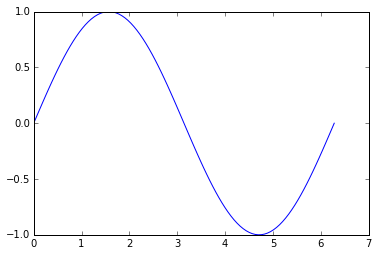

In [7]:
line = plt.plot(x, np.sin(x))
plt.setp(line)

# Multiple axes

there are a wide range of methods for putting multiple axes on a grid.  We'll look at the simplest method.  All plotting commands apply to the current set of axes

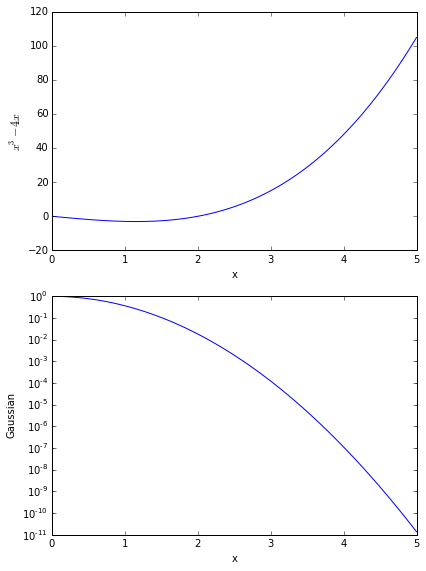

In [8]:
plt.subplot(211)

x = np.linspace(0,5,100)
plt.plot(x, x**3 - 4*x)
plt.xlabel("x")
plt.ylabel(r"$x^3 - 4x$", fontsize="large")

plt.subplot(212)

plt.plot(x, np.exp(-x**2))
plt.xlabel("x")
plt.ylabel("Gaussian")

# log scale
ax = plt.gca()
ax.set_yscale("log")

# get the figure and set its size
f = plt.gcf()
f.set_size_inches(6,8)

# tight_layout() makes sure things don't overlap
plt.tight_layout()
plt.savefig("test.png")

# Visualizing 2-d array data

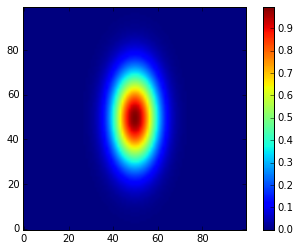

In [9]:
def g(x, y):
    return np.exp(-((x-0.5)**2)/0.1**2 - ((y-0.5)**2)/0.2**2)

N = 100

x = np.linspace(0.0,1.0,N)
y = x.copy()

xv, yv = np.meshgrid(x, y)

plt.imshow(g(xv,yv), origin="lower")
plt.colorbar()


(0.0, 100.0, 0.0, 100.0)

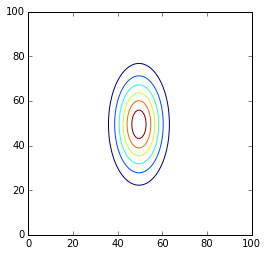

In [10]:
plt.contour(g(xv,yv))
plt.axis("scaled")   # this adjusts the size of image to make x and y lengths equal


# Surface plots

matplotlib can't deal with true 3-d data (i.e., x,y,z + a value), but it can plot 2-d surfaces and lines in 3-d.

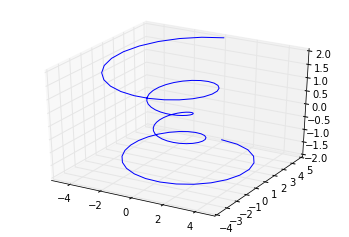

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection="3d")

# parametric curves
N = 100
theta = np.linspace(-4*np.pi, 4*np.pi, N)
z = np.linspace(-2, 2, N)
r = z**2 + 1

x = r*np.sin(theta)
y = r*np.cos(theta)

ax.plot(x,y,z)

  agg_filter: unknown
  alpha: float or None         
  animated: [True | False]         
  antialiased or antialiaseds: Boolean or sequence of booleans         
  array: unknown
  axes: an :class:`~matplotlib.axes.Axes` instance         
  clim: a length 2 sequence of floats         
  clip_box: a :class:`matplotlib.transforms.Bbox` instance         
  clip_on: [True | False]         
  clip_path: [ (:class:`~matplotlib.path.Path`,         :class:`~matplotlib.transforms.Transform`) |         :class:`~matplotlib.patches.Patch` | None ]         
  cmap: a colormap or registered colormap name         
  color: matplotlib color arg or sequence of rgba tuples
  contains: a callable function         
  edgecolor: unknown
  edgecolors: unknown
  facecolor: unknown
  facecolors: unknown
  figure: a :class:`matplotlib.figure.Figure` instance         
  gid: an id string         
  hatch: [ '/' | '\\' | '|' | '-' | '+' | 'x' | 'o' | 'O' | '.' | '*' ]         
  label: string or anything printab

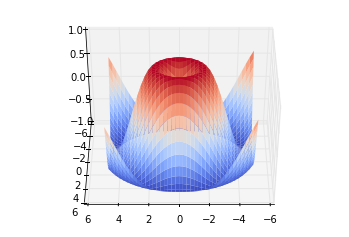

In [12]:
fig = plt.figure()
ax = fig.gca(projection="3d")
X = np.arange(-5,5, 0.25)
Y = np.arange(-5,5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="coolwarm")

# we can use setp to investigate and set options here too
plt.setp(surf)
plt.setp(surf,lw=0)
plt.setp(surf, facecolor="red")


# and the view (note: most interactive backends will allow you to rotate this freely)
ax = plt.gca()
ax.azim = 90
ax.elev = 40

# Plotting on a sphere

the map funcationality expects stuff in longitude and latitude, so if you want to plot x,y,z on the surface of a sphere using the idea of spherical coordinates, remember that the spherical angle from z (theta) is co-latitude

note: you need the python-basemap package installed for this to work

This also illustrates getting access to a matplotlib toolkit

(1, 0, 0)
(0, 1, 0)
(0, 0, 1)


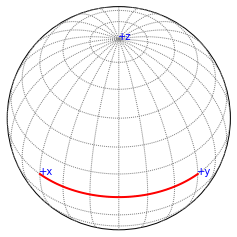

In [13]:
def to_lonlat(x,y,z):
    SMALL = 1.e-100
    rho = np.sqrt((x + SMALL)**2 + (y + SMALL)**2)
    R = np.sqrt(rho**2 + (z + SMALL)**2)
    
    theta = np.degrees(np.arctan2(rho, z + SMALL))
    phi = np.degrees(np.arctan2(y + SMALL, x + SMALL))
    
    # latitude is 90 - the spherical theta
    return (phi, 90-theta)


from mpl_toolkits.basemap import Basemap

# other projections are allowed, e.g. "ortho", moll"
map = Basemap(projection='ortho', lat_0 = 45, lon_0 = 45,
              resolution = 'l', area_thresh = 1000.)

map.drawmapboundary()

map.drawmeridians(np.arange(0, 360, 15), color="0.5", latmax=90)
map.drawparallels(np.arange(-90, 90, 15), color="0.5", latmax=90) #, labels=[1,0,0,1])

# unit vectors (+x, +y, +z)
points = [(1,0,0), (0,1,0), (0,0,1)]
labels = ["+x", "+y", "+z"]

for i in range(len(points)):
    p = points[i]
    print(p)
    lon, lat = to_lonlat(p[0], p[1], p[2])
    xp, yp = map(lon, lat)
    s = plt.text(xp, yp, labels[i], color="b", zorder=10)

# draw a great circle arc between two points
lats = [0, 0]
lons = [0, 90]

map.drawgreatcircle(lons[0], lats[0], lons[1], lats[1], linewidth=2, color="r")



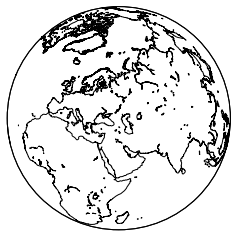

In [14]:
map = Basemap(projection='ortho', lat_0 = 45, lon_0 = 45,
              resolution = 'l', area_thresh = 1000.)

map.drawcoastlines()
map.drawmapboundary()

# Histograms

here we generate a bunch of gaussian-normalized random numbers and make a histogram.  The probability distribution should match
$$y(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-x^2/(2\sigma^2)}$$

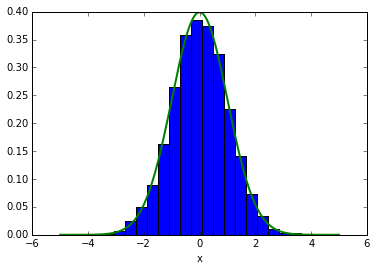

In [15]:
N = 10000
r = np.random.randn(N)
plt.hist(r, normed=True, bins=20)

x = np.linspace(-5,5,200)
sigma = 1.0
plt.plot(x, np.exp(-x**2/(2*sigma**2))/(sigma*np.sqrt(2.0*np.pi)),
         c="r", lw=2)
plt.xlabel("x")


# Plotting data from a file

numpy.loadtxt() provides an easy way to read columns of data from an ASCII file

In [16]:
data = np.loadtxt("test1.exact.128.out")
print(data.shape)

(128, 8)


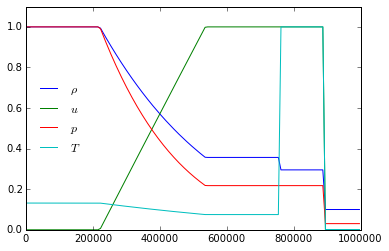

In [17]:
plt.plot(data[:,1], data[:,2]/np.max(data[:,2]), label=r"$\rho$")
plt.plot(data[:,1], data[:,3]/np.max(data[:,3]), label=r"$u$")
plt.plot(data[:,1], data[:,4]/np.max(data[:,4]), label=r"$p$")
plt.plot(data[:,1], data[:,5]/np.max(data[:,5]), label=r"$T$")
plt.ylim(0,1.1)
plt.legend(frameon=False, loc="best", fontsize=12)

# Interactivity

matplotlib has it's own set of widgets that you can use, but recently, Ipython gained the interact() function

In [18]:
from IPython.html.widgets import *
from IPython.display import display

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [19]:
x = np.linspace(0,1,100)
def plotsin(f):
    plt.plot(x, np.sin(2*np.pi*x*f))

<function __main__.plotsin>

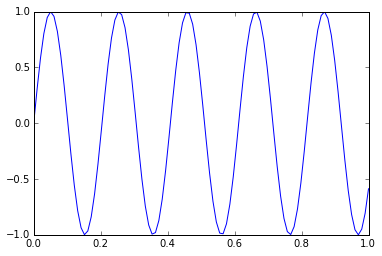

In [20]:
interact(plotsin, f=(1,10,0.1))

<function __main__.hist>

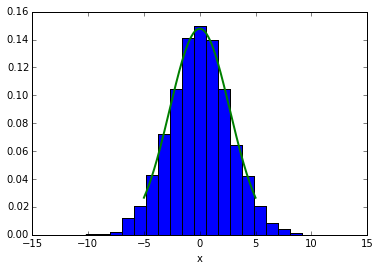

In [21]:
# interactive histogram
def hist(N, sigma):
    r = sigma*np.random.randn(N)
    plt.hist(r, normed=True, bins=20)

    x = np.linspace(-5,5,200)
    
    plt.plot(x, np.exp(-x**2/(2*sigma**2))/(sigma*np.sqrt(2.0*np.pi)),
             c="r", lw=2)
    plt.xlabel("x")
    
interact(hist, N=(100,10000,10), sigma=(0.5,5,0.1))

In [22]:
# based on http://nbviewer.ipython.org/github/adrn/ipython/blob/2.x/examples/Interactive%20Widgets/Widget%20Events.ipynb
def update_button(button):
    button.clicks += 1
    button.description = "%d" % button.clicks

button = Button(description = "Start")
button.clicks = 0
display(button)
button.on_click(update_button)

# Final fun

if you want to make things look hand-drawn in the style of xkcd, rerun these examples after doing
plt.xkcd()

In [23]:
plt.xkcd()